<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Linear Regression Model Assumptions

Week 3 | 4.2


---


### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Identify the Gauss Markov assumptions and why they are important 
- Build linear regression models with interaction terms and interpret results accordingly 


### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Review 
- Extract data from pandas DataFrames
- Fit a linear regression for one variable


### INSTRUCTOR PREP
*Before this lesson, instructors will need to:*
- Read in / Review any dataset(s) & starter/solution code
- Generate a brief slide deck
- Prepare any specific materials
- Provide students with additional resources

Lesson Objectives: 

- Identify the Gauss Markov assumptions and why they are important 

- Build linear regression models with interaction terms and interpret results accordingly 

## Introduction

Recall linear regression can be written as: 

$$ y_i = \beta_0 + \beta_1x_{1i} + .. + \beta_px_{pi} + \epsilon_i ~\text{where} ~x_{i}, y_{i} \in \mathbb{R}^{p} ~\text{,}~ i~ \text{denotes row , } ~j~ \text{denotes column}$$

This states that both random variables $x_i$ and $y_i$ have elements with real values and that there are $p$ number of rows in the $X$ matrix. Which is often refered to as a **design matrix**.


$$ Y = X\beta + \epsilon ~~~~~\text{where} ~~\epsilon~
\sim N(0, \sigma^2)$$

This is the concise vector notataion for linear regression. Notice how the **error terms are drawn from a normal distribtuion**. 

### Interpreting Linear Regression

The parameters $\beta_{i}$ in front of each variable $x_{1}$ have a real interpretable meaning. 

>For every one unit increase in a predictor $x_i$ there is a increase of $ beta_i$ in the response variable. In other words, beta is the rate of change between the response y and the predictor $x_{i}$

$$ \frac{dy}{dx_i} = \beta_{i} ~,~\forall~ \beta_{i}$$

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from IPython.display import YouTubeVideo

In [3]:
house = '~/DSI-SF-5/datasets/fast_food_chains/discrim.csv' 
df_house = pd.read_csv(house)
df_house.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1.11,1.11,...,18,0.113329,0.058269,11.90699,10.70401,8.301521,1,0,0,1
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,1.05,0.89,...,18,0.058269,-0.094311,11.90699,10.70401,8.301521,1,1,0,0
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,1.05,0.94,...,12,0.058269,-0.094311,12.03884,10.62532,9.341369,1,1,0,0
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,1.15,1.05,...,10,0.113329,0.019803,12.05292,10.82707,9.029418,1,0,0,1
4,1.12,NaN,0.49,5.00,3.0,3.0,16.0,5.0,1.04,1.01,...,10,0.113329,NaN,12.42561,11.18840,6.579251,1,1,0,0


In [77]:
# seperate the dataset into the design matrix (the predictors) and the response 
X = df_house[["sqft", "bdrms", "age"]]
Y = df_house.price

In [79]:
lr = LinearRegression()
lr.fit(X, Y);

In [88]:
# these are the corresponding beta values for sqrt, bdroms, and age
lr.coef_

array([  139.33484671, -8621.47045953,   -81.21787764])

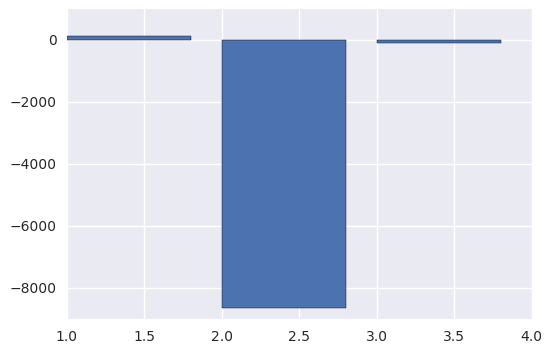

In [87]:
plt.bar([1,2,3], lr.coef_);

**Check for understanding:** What do the betas tell about how each predictor (sqrt, bdroms, and age) is affecting the response variable (house price)?

## Best Linear Unbiased Estimator (BLUE)

In the morning lesson, we learned about the ordinary least squares method for finding the best fit line for linear regression. What we didn't talk about is what assumptions need to be true in order to find that best fit line by minimizing the square residuals. 

The Gauss-Markov Theorm staes that: 

>A linear regression model in which the errors have expectation zero and are uncorrelated and have equal variances, the best linear unbiased estimator (BLUE) of the coefficients is given by the ordinary least squares (OLS) estimator. Here "best" means giving the lowest variance of the estimate, as compared to other unbiased, linear estimators
--Wikipedia

The conditons for BLUE are:

1. Linearity 
2. The expectation value of the residuals is zero $\mathbb {E}[\mathbf{\epsilon}]=0$
3. Homoscedastic - that is all residual terms have the same finite variance  Var($\epsilon _{i})=\sigma ^{2}<\infty$
4. Distinct error terms are uncorrelated: $ ~\text{Cov}(\varepsilon _{i},\varepsilon _{j})=0,\forall i\neq j.$
5. Lack of multicollinearity

Now let's look at each of them in turn.

## Gauss Markov Assumptions 

### 1. Linearity in parameters dependent variables and beta

The model must be linear in the parameters.
The parameters are the coefficients on the independent variables, like $ \alpha$  and $\beta$. These should be linear, so having $\beta ^{2}$ or $e^{\beta } $ would violate this assumption.


$$f(\mathbf {x} +\mathbf {y} )=f(\mathbf {x} )+f(\mathbf {y})$$

$$f(\alpha \mathbf {x} )=\alpha f(\mathbf {x} )$$


Where $\mathbf {x}$ and $\mathbf {y} $ are vectors, $\alpha$ is a real-valued constant, and $f$ is a linear operator



The dependent variable is assumed to be a linear function of the variables specified in the model. The specification must be linear in its parameters. This does not mean that there must be a linear relationship between the independent and dependent variables. The independent variables can take non-linear forms as long as the parameters are linear. The equation $ y=\beta _{0}+\beta _{1}x^{2}$  qualifies as linear while $ y=\beta _{0}+\beta _{1}^{2}x $ does not. **An equation with a parameter dependent on an independent variable does not qualify as linear** $y=\beta _{0}+\beta _{1}(x)\cdot x $, where $ \beta _{1}(x)$ is a function of $x$.



**Check for understanding:** Which of the following uphold the first GM assumption? 

1. $ price = \beta_0 + \beta_1*sqrft + \beta_2*crimerate $ 

2. $ price = \beta_0 + \beta_1 * LotArea * GaragePresent $ 

3. $ price = exp(\beta_0 + \beta_1 * number of rooms) $

4. $ log(price) = \beta_0 + \beta_1 * log(LotArea + 1) $ 

5. $ price = \beta_0 + \beta_1 * LotArea^2 $ 

### Interaction Terms

Interactions are used whenever we want to model an interaction between two or more random variables in our model.

$$ y = \beta_0 + \beta_1x_{1} + \beta_1(x_{1}*x_{2}) + \beta_1x_{2} + \epsilon $$

If $x_{1}$ is age, $x_{2}$ is education, and $y$ is inclome, perhaps we'd like to see how the interaction of age and education interact to influence someone's income. 

Yes, this model is still linear. Remeber, linearity is defined by the betas.

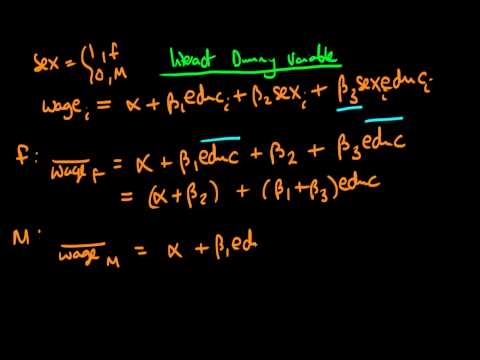

In [1]:
#Aside: Interaction Terms in Regression Models
YouTubeVideo('ScKL40dp8M4')

### 2. Errors Have Zero Mean

The expectation value of the residuals is zero $\mathbb {E}[\mathbf{\epsilon}]=0$ essentailly means that errors must be normally distributed. This condition can easily be checked by taking the simple mean of all residuals. In practice, the mean is usually not exactly, but close. 

Sometimes residual erros are also refered to as noise. Whenever noise is normally distributed, it is refered to as **white nosie**.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
mu = 0
sigma = 1
white_noise = np.random.normal(mu, sigma, 1000)

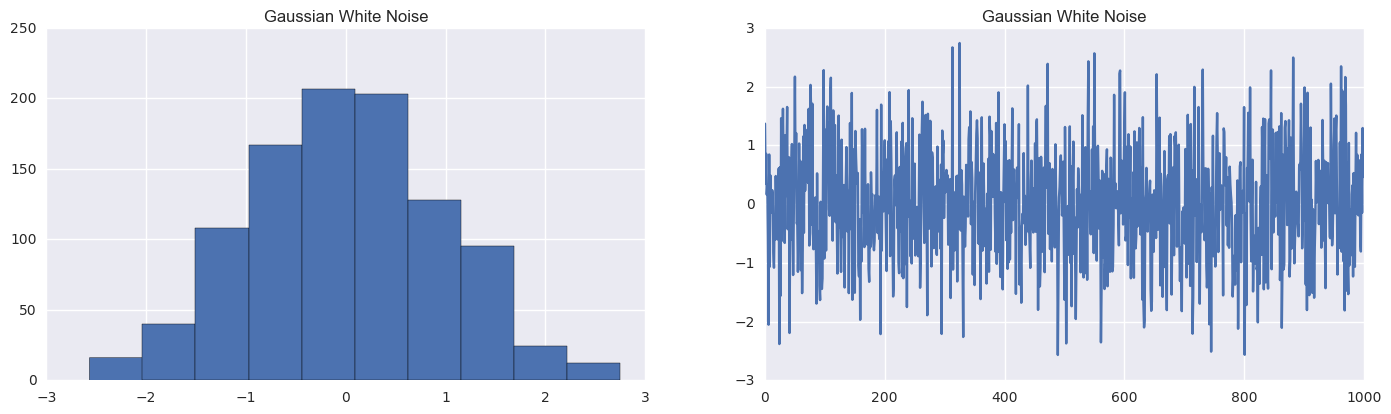

In [24]:
fig = plt.figure(figsize = (17,10))
fig.add_subplot(221)
plt.title("Gaussian White Noise")
plt.hist(white_noise);
fig.add_subplot(222)
plt.title("Gaussian White Noise")
plt.plot(white_noise);

In [25]:
expectataion_value = np.mean(white_noise)
expectataion_value

0.0015486085230459973

### 3. Homoscedastic

Homoscedastic means that that is all residual terms have the same finite variance  Var($\epsilon _{i})=\sigma ^{2}<\infty$. Which is another way of saying that they are drawn from the same normal distribution. 




#### Heteroskedasticity

If residual terms are not drawn from the same underlying distribution, then they data points will appear to 'fan out' on a plot.

<img src=http://i.stack.imgur.com/RXQv9.png>


The plot below shows that the 'faning out' behavior is characteristic having residual terms that have been drawn from different distributions.

![](https://i.stack.imgur.com/MXOOR.png)



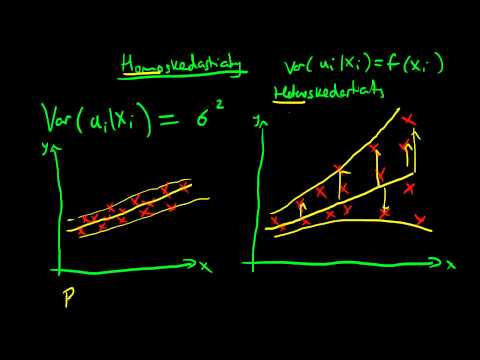

In [2]:
# Check out the video on Heteroskedasticity for another explaination
YouTubeVideo('zRklTsY9w9c')

**Check for Understanding:** Why is Heteroskedasticity in our dataset set undesirable?

### 4. Error Terms are not correlated with each other

$$ Cov(\epsilon_i, \epsilon_j) = 0, \forall i \neq j$$

The condition that residual terms are uncorrelated with with each is essentially another way of saying that they have been drawn from  a **random distribtuion**. 


In [31]:
noise_df = pd.DataFrame(white_noise)

In [91]:
# index the first residual as error i
error_i = white_noise[-1]
error_i

0.46318077615727504

In [94]:
# calculate the covariance between error i and all other residuals in a pair-wise fashion
error_cov = [np.cov([error_i,error_j]) for error_j in white_noise[:-1]]

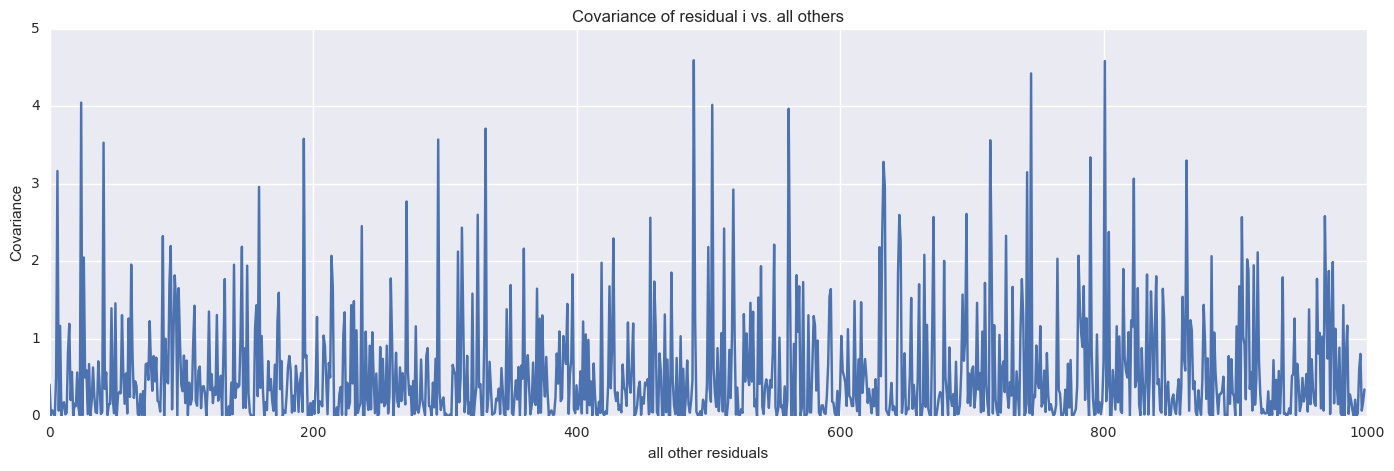

In [95]:
# plot the covariance and confirm that there is zero covariance with the residuals
fig = plt.figure(figsize = (17,5))
plt.title("Covariance of residual i vs. all others")
plt.ylabel("Covariance")
plt.xlabel("all other residuals")
plt.plot(error_cov);

### 5. Lack of Multicollinearity

For standard least squares estimation methods, the design matrix X must have full column rank p; otherwise, we have a condition known as multicollinearity in the predictor variables. 

Mathematically, a set of variables is perfectly multicollinear if there exist one or more exact linear relationships among some of the variables. 

**In linear algebra terms**, multicollinear represents a linear combination between two or more of the predictors. 

This can be triggered by having two or more perfectly correlated predictor variables (e.g. if the same predictor variable is mistakenly given twice, either without transforming one of the copies or by transforming one of the copies linearly). 

# Resources 

[Markov_theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem) Wiki on Linear Regression assumptions and conditions. 